In [1]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

%load_ext autoreload
%autoreload 2

import sys
import re
import matplotlib
%matplotlib inline
import pandas as pd 
import numpy as np 
import src.model as model 
import src.utils as utils
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from src.model import *

df = utils.preprocessing()     

regex = re.compile(r"\[|\]|<", re.IGNORECASE)
df.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in df.columns.values]

X = df.loc[:, df.columns != 'AE']
y = df['AE']

/usr/local/Caskroom/miniconda/base/envs/ml4down/lib/python3.9/site-packages/sklearn/impute/_iterative.py:713: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


[15:20:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
==> MSE: 102.1480125806584
==> R2": 0.8824770714267962



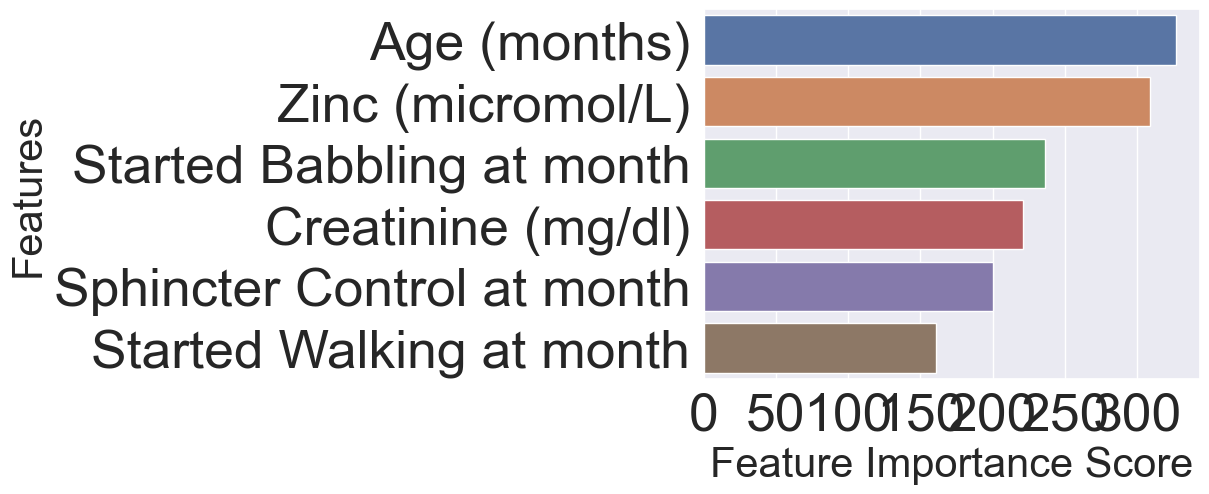

In [2]:
params = {'colsample_bytree': 0.5,
          'gamma': 0.1, 
          'learning_rate': 0.05,
          'max_depth': 5, 
          'n_estimators': 100,
          'sumsamples': 0.25,
          'score': 'neg_mean_squared_error', 
          'train_size': 0.7}

features = ['Age (months)', 'Creatinine (mg/dl)', 'Zinc (micromol/L)', 'Started Babbling at month',
            'Started Walking at month', 'Sphincter Control at month']

score = 'neg_mean_squared_error'

xgb = utils.feature_importance_model(XGBoost, X, y, params=params, features=features, score=score, t_model='xgb')
xgb.plot_importance()

In [3]:
target_var = 'Age (months)'
#df = df.sort_values("Age (months)")  # for plotting purposes
df = utils.effect_mitigation(df)
X = df.drop(columns=['AE', 'Age (months)'], axis=1)
y = df['AE']

/usr/local/Caskroom/miniconda/base/envs/ml4down/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
params = {}

features = []

score = 'neg_mean_squared_error'

xgb = utils.feature_importance_model(XGBoost, X, y, params=params, features=features, score=score, t_model='xgb')
xgb.plot_importance()

In [4]:
#df = utils.data_augmentation(df, 'AE')                   
#utils.save(df, './data/aug_downsyndrom')      

df = pd.read_csv('./data/aug_downsyndrom.csv', delimiter=';')

df = utils.treat_nan(df)

X = df.drop(columns=['AE', 'AE_cat'], axis=1)
y = df['AE']
y_cat = df['AE_cat']

/usr/local/Caskroom/miniconda/base/envs/ml4down/lib/python3.9/site-packages/sklearn/impute/_iterative.py:713: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


[15:24:07] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
==> MSE: 0.04834326894398556
==> R2": 0.9173420691221754



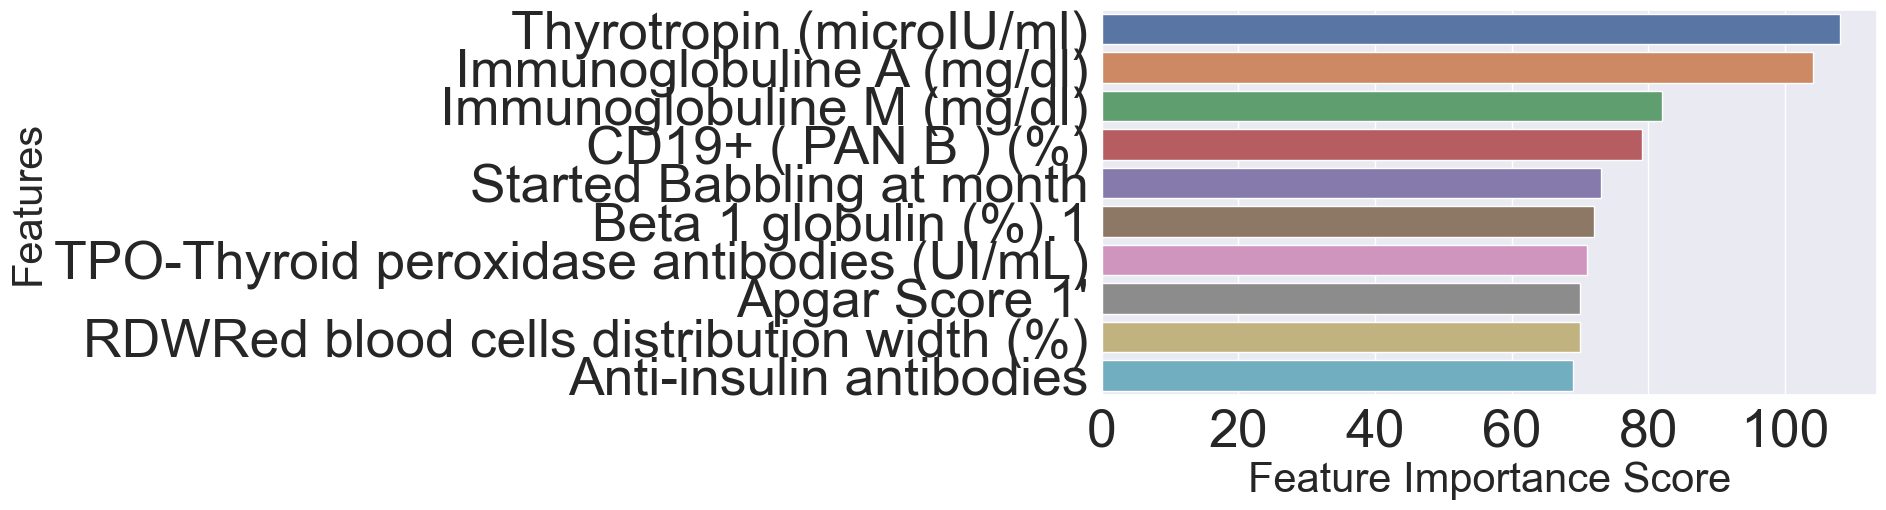

In [5]:
params = {'colsample_bytree': 0.25,
          'gamma': 0.1,
          'learning_rate': 0.15,
          'max_depth': 6, 
          'n_estimators': 150,
          'sumsamples': 0.25,
          'score': 'neg_mean_squared_error', 
          'train_size': 0.7}

features = ['Hematocrit (%)', 'RDWRed blood cells distribution width (%)', 'HDW-Hemoglobin distribution width (g/dL)',
            'Lymphocytes  (10^3/mmc)', 'CD3+CD4+ (%)', 'CD3+CD4+ (Helper) (mmc)', 'CD56+CD16+CD3- ( NK ) (%)',
            'CD19+ ( PAN B ) (%)', 'Uric acid (mg/dL)', 'Total cholesterol (mg/dL)', 'Cholesterol HDL (mg/dl)',
            'Chloride (mmol/L)', 'Magnesium (mg/dL)', 'Albumin', 'Direct bilirubin (mg/dL)', 
            'Indirect bilirubin (mg/dL)', 'Iron (microgr/dL)', 'Transferrin (mg/dL)', 'Ferritin (ng/mL)',
            'Folic acid (ng/mL)', 'Vitamin B12 (pg/ml)', 'Immunoglobuline A (mg/dl)', 'Immunoglobuline M (mg/dl)',
            'Anti-insulin antibodies', 'Thyrotropin (microIU/ml)', 'Anti-thyroglobulin Antibody (AbTg) (UI/mL)',
            'TPO-Thyroid peroxidase antibodies (UI/mL)', 'Albumin (%)', 'Alpha 1 globulin (%)', 'Beta 1 globulin (%)',
            'Beta 1 globulin (%).1', 'Gamma globulin(%)', 'A/G albumin/globulin ratio (1)', 'MTHFR Genotype', 
            'Mother Age yrs', 'Birth Weight Kg', 'Birth Length cm', 'Birth OFC cm', "Apgar Score 1'",
            'Started Sitting at month', 'Started Babbling at month', 'Started Walking at month', 
            'Sphincter Control at month', 'Weight Kg', 'Height cm', 'Hearing Loss', 'Strabismus', 'Myopia', 
            'Heart Surgery', 'Separation of the Abdominal Muscle', 'Umbilical Hernia', 'Duodenal Atresia', 
            'Imperforate Anus', 'Hirschprung Disease', 'Obstructive Sleep Apnea', 'Seizures', 'Hypothyroidism',
            'TSH µU per mL', 'Celiac Disease', 'Small Genitalia', "Jackson's Signs - Yes"]

score = 'neg_mean_squared_error'

xgb = utils.feature_importance_model(XGBoost, X, y, params=params, features=features, score=score, t_model='xgb')
xgb.plot_importance()

==> Accuracy:               precision    recall  f1-score   support

         1.0       0.88      0.83      0.85       927
         2.0       0.80      0.85      0.83       743

    accuracy                           0.84      1670
   macro avg       0.84      0.84      0.84      1670
weighted avg       0.84      0.84      0.84      1670

==> R2": 0.9523809523809523



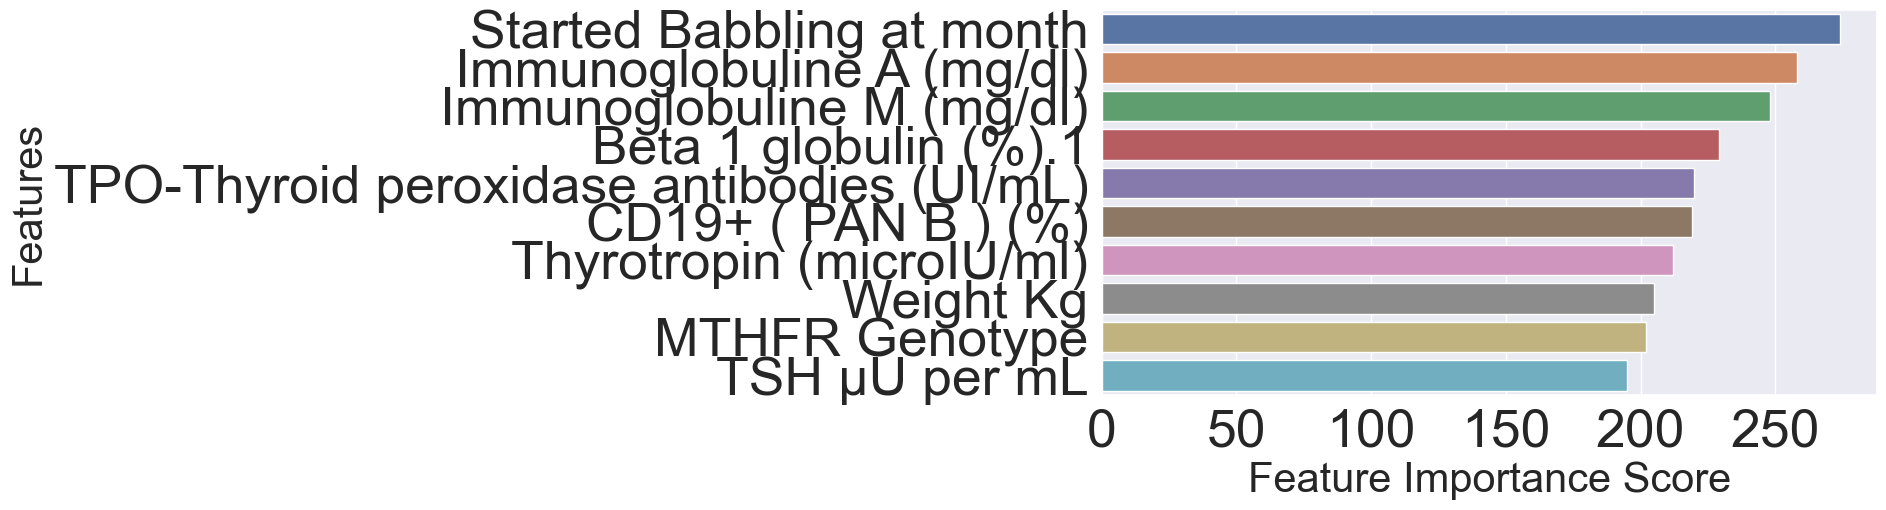

In [6]:
params = {'colsample_bytree': 0.5, 
          'gamma': 0.1, 
          'learning_rate': 0.15, 
          'max_depth': 8, 
          'n_estimators': 150,
          'sumsamples': 0.25,
          'score': 'accuracy',
          'train_size': 0.7}

features = ['Erythrocytes (10^6/mmc)', 'MCH-Mean corpuscular hemoglobin (pg)', 
            'RDWRed blood cells distribution width (%)', 'HDW-Hemoglobin distribution width (g/dL)',
            'Platelet count (10^3/microL)', 'CD3+CD4+ (%)', 'CD56+CD16+CD3- ( NK ) (%)', 'CD19+ ( PAN B ) (%)',
            'Creatinine (mg/dl)', 'Uric acid (mg/dL)', 'Total cholesterol (mg/dL)', 'Cholesterol HDL (mg/dl)',
            'Zinc (micromol/L)', 'Magnesium (mg/dL)', 'Albumin', 'Direct bilirubin (mg/dL)',
            'Indirect bilirubin (mg/dL)', 'Iron (microgr/dL)', 'Ferritin (ng/mL)', 'Folic acid (ng/mL)',
            'Vitamin B12 (pg/ml)', 'Immunoglobuline A (mg/dl)', 'Immunoglobuline M (mg/dl)', 
            'Human tissue transglutaminase IgA antibodies (U/mL)', 'Thyrotropin (microIU/ml)',
            'Anti-thyroglobulin Antibody (AbTg) (UI/mL)', 'TPO-Thyroid peroxidase antibodies (UI/mL)', 'Albumin (%)',
            'Beta 1 globulin (%)', 'Beta 1 globulin (%).1', 'MTHFR Genotype', 'Birth Length cm', 'Birth OFC cm', 
            "Apgar Score 1'", 'Started Sitting at month', 'Started Babbling at month', 'Sphincter Control at month',
            'Weight Kg', 'Flat Facial Profile', 'Hearing Loss', 'Strabismus', 'Heart Surgery', 'Umbilical Hernia',
            'Duodenal Atresia', 'Imperforate Anus', 'Hirschprung Disease', 'Obstructive Sleep Apnea', 'Seizures',
            'Hypothyroidism', 'TSH µU per mL', 'Celiac Disease', 'Diarrhea']

score = 'accuracy'

xgb = utils.feature_importance_model(XGBoost, X, y_cat, params=params, features=features, score=score, t_model='xgb')
xgb.plot_importance()

In [7]:
target_var = 'Age (months)'
#df = df.sort_values("Age (months)")  # for plotting purposes
df = utils.effect_mitigation(df)
X = df.drop(columns=['AE', 'Age (months)', 'AE_cat'], axis=1)
y = df['AE']
#y_cat = df['AE_cat']

In [8]:
params = {}

features = []

score = 'neg_mean_squared_error'

xgb = utils.feature_importance_model(XGBoost, X, y, params=params, features=features, score=score, t_model='xgb')
xgb.plot_importance()

ValueError: Please check your X and y variable. The providedestimator cannot be fitted to your data.
Invalid Parameter format for seed expect int but value='RandomState(MT19937)'

In [ ]:
params = {}

features = []

score = 'accuracy'

xgb = utils.feature_importance_model(XGBoost, X, y_cat, params=params, features=features, score=score, t_model='xgb')
xgb.plot_importance()